In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [4]:
df.info()
# df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
df = df.dropna()
# budget is big value so no decimals nedded or look good, changing data type
df.budget = df.budget.astype('int64')
df.gross = df.gross.astype('int64')
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [6]:
# conflict in released any year so taking release year from 4 starting charecters of released column
df['release_year'] = df.released.astype(str).str[8:13]

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [7]:
df.duplicated().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

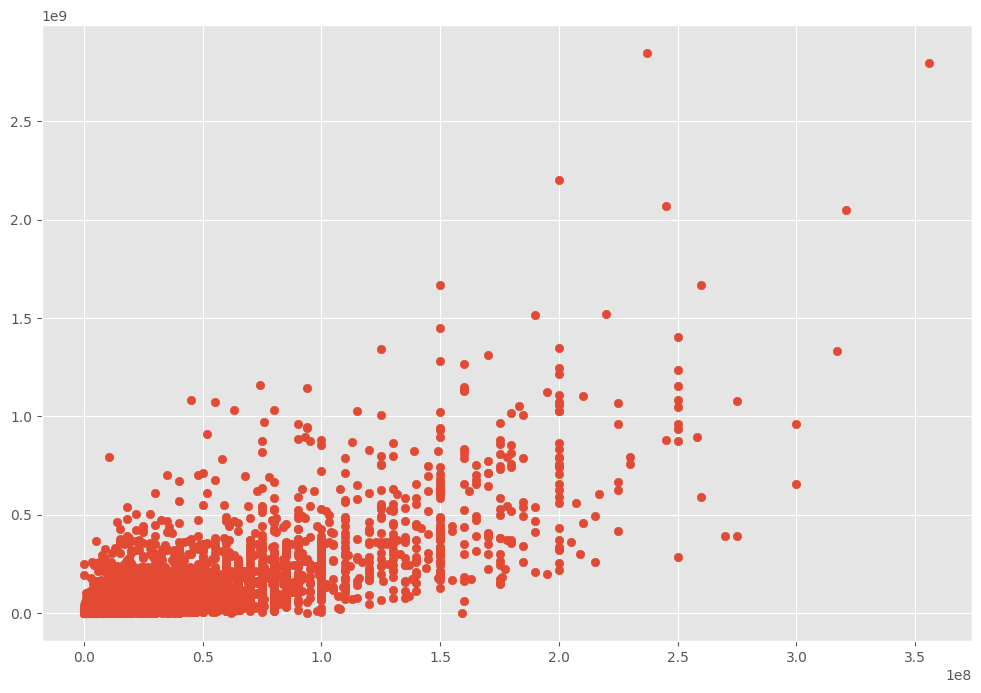

In [8]:
# coorelation between budget,gross,company
# libraries for further analysis

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Scatter plot
plt.scatter(x=df['budget'], y=df['gross'])
plt.show

<Axes: xlabel='gross', ylabel='budget'>

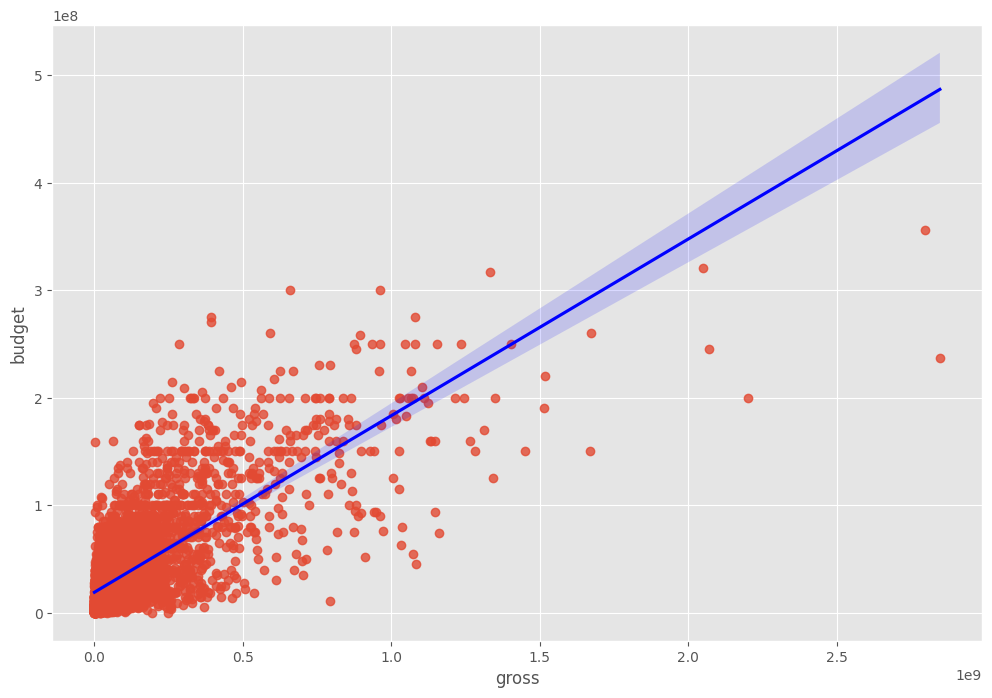

In [9]:
# checking budget of movie with gross profits
import seaborn as sns

sns.regplot(x="gross", y="budget", data=df, line_kws={"color": "blue"})
# looks like more budget return more profit

<Axes: xlabel='score', ylabel='gross'>

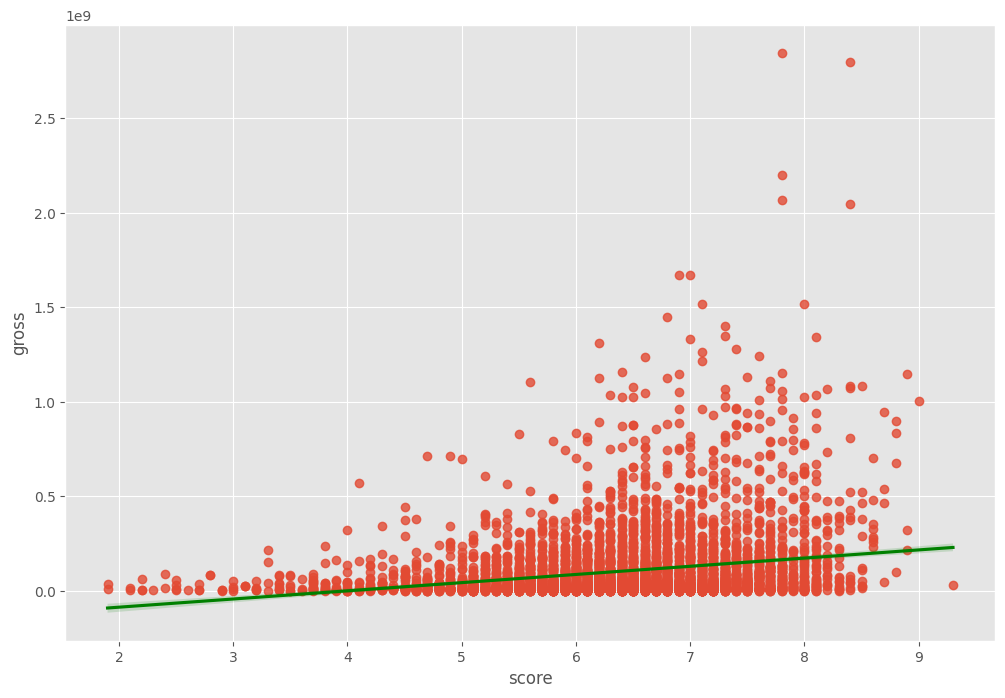

In [10]:
# coorelation betwoeen score and gross profit
sns.regplot(x="score", y="gross", data=df, line_kws={"color": "green"})

In [15]:
# Correlation Matrix between all numeric columns

# df.corr(method ='pearson')
# df.info()
# df1.corr(method ='kendall')
# df1.corr(method = 'spearman')
# import numpy as np
# df = df.dropna()
# df.isnull().sum()
# lets change df to numeric for better analysis of coorelation
df1=df
df1 = df1.apply(lambda x: x.factorize()[0]).corr(method='pearson')
# df1 = pd.to_numeric(df1, errors='coerce').fillna(0).astype(int)
df1.corr('pearson')


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
name,1.000000,0.020444,-0.241211,0.998966,0.999114,-0.396915,0.276655,0.939604,0.968254,0.922444,-0.133522,0.184485,0.999177,0.769110,-0.324588,0.836217
rating,0.020444,1.000000,-0.395754,0.023597,0.018257,-0.082676,0.057335,-0.042884,-0.008792,-0.029397,-0.214215,0.231970,0.019156,-0.205213,-0.098502,-0.004331
genre,-0.241211,-0.395754,1.000000,-0.244911,-0.241396,-0.132704,-0.227022,-0.199819,-0.219929,-0.203394,-0.127886,-0.197769,-0.240536,-0.167600,-0.116954,-0.227031
year,0.998966,0.023597,-0.244911,1.000000,0.999920,-0.399269,0.291342,0.940240,0.968894,0.923850,-0.144726,0.200637,0.999875,0.760547,-0.324242,0.842003
released,0.999114,0.018257,-0.241396,0.999920,1.000000,-0.398983,0.283553,0.942146,0.969297,0.925300,-0.138907,0.192585,0.999980,0.767037,-0.326625,0.839853
score,-0.396915,-0.082676,-0.132704,-0.399269,-0.398983,1.000000,-0.328110,-0.353542,-0.385814,-0.341944,-0.091624,-0.263456,-0.395693,-0.291371,-0.079870,-0.326797
votes,0.276655,0.057335,-0.227022,0.291342,0.283553,-0.328110,1.000000,0.169016,0.219940,0.161123,-0.306741,0.529645,0.279077,-0.087200,0.025323,0.237013
director,0.939604,-0.042884,-0.199819,0.940240,0.942146,-0.353542,0.169016,1.000000,0.951584,0.917755,-0.091896,0.027879,0.942788,0.788669,-0.387307,0.787844
writer,0.968254,-0.008792,-0.219929,0.968894,0.969297,-0.385814,0.219940,0.951584,1.000000,0.911813,-0.110274,0.117477,0.969723,0.769166,-0.343523,0.809715
star,0.922444,-0.029397,-0.203394,0.923850,0.925300,-0.341944,0.161123,0.917755,0.911813,1.000000,-0.100940,0.034288,0.925914,0.757668,-0.336826,0.774988


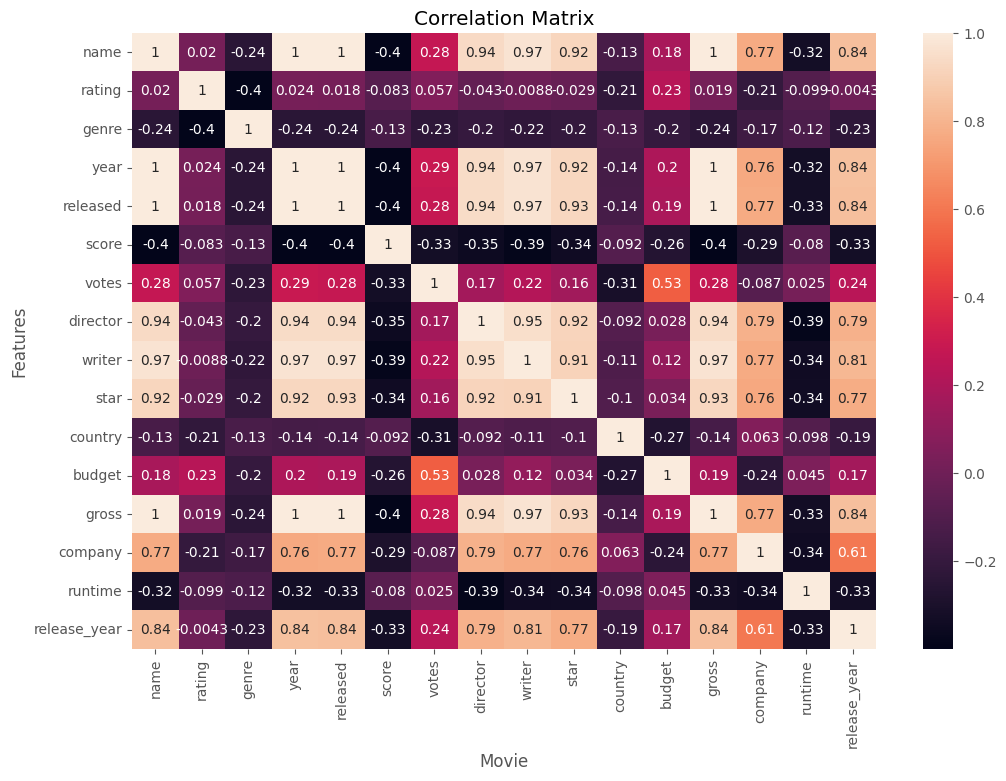

In [16]:
# visual rep of coorelation but still nan in dataset lets try lamda
df1 = df
df1 = df1.apply(lambda x: x.factorize()[0]).corr(method='pearson')
# df1.isnull().sum()
correlation_matrix = df1.corr()
import seaborn as sns
sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix')
plt.xlabel('Movie')
plt.ylabel('Features')
plt.show()

In [17]:
# lates make stacks to see correlation in liner visual way
corr1 = df1
cor_pairs = corr1.unstack()
cor_pairs


name          name            1.000000
              rating          0.169808
              genre           0.028413
              year            0.965461
              released        0.966086
                                ...   
release_year  budget          0.209578
              gross           0.604825
              company         0.313165
              runtime         0.014887
              release_year    1.000000
Length: 256, dtype: float64

In [18]:
# sorting out pairs
sort_pairs = cor_pairs.sort_values()
sort_pairs

rating        genre          -0.116507
genre         rating         -0.116507
budget        company        -0.053573
company       budget         -0.053573
votes         score          -0.041981
                                ...   
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
release_year  release_year    1.000000
Length: 256, dtype: float64

In [19]:
# finding high correlation
high_corr = sort_pairs[(sort_pairs) > 0.5]
print(high_corr)

writer        release_year    0.509377
release_year  writer          0.509377
company       name            0.535369
name          company         0.535369
company       year            0.537731
                                ...   
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
release_year  release_year    1.000000
Length: 76, dtype: float64


In [20]:
# lets find top15 companies yieling high profits
comp_gross_total = df.groupby('company').gross.sum()
# sorting comp_gross_total
comp_gross_total = comp_gross_total.sort_values(ascending=False)
comp_gross_total.head(15)


company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [21]:
# lets see it with company year and gross
df.groupby(['company', 'year'])[["gross"]].sum()

gross
company                             year           
"DIA" Productions GmbH & Co. KG     2003   44350926
"Weathering With You" Film Partners 2019  193457467
.406 Production                     1996      10580
1492 Pictures                       1996  129832389
                                    1999   87423861
...                                             ...
erbp                                2013     587174
i am OTHER                          2015   17986781
i5 Films                            2001   10031529
micro_scope                         2010    7099598
thefyzz                             2017   62198461

[2987 rows x 1 columns]

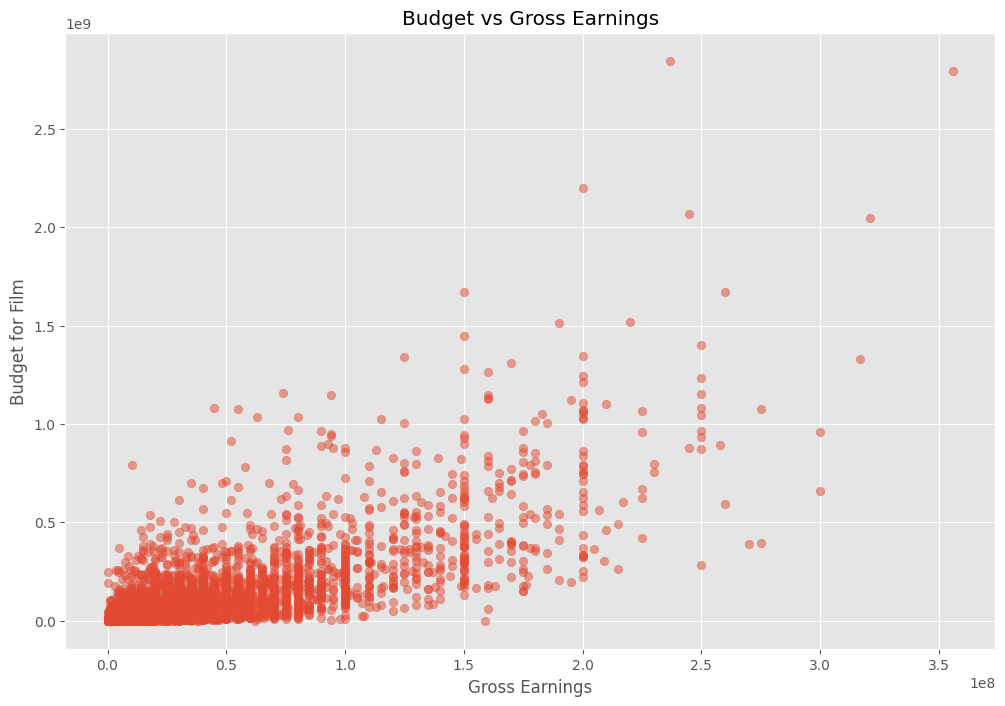

In [22]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

as shown above movies under budget have high gross earnings in comparison to gross earnings but as outliers indicates more budget return more gross earnings.